# Garments Project (by: The Guo Family)

Garmets are worn every day by humans around the world. From the famous and highly sought after fashion houses such as the Haus of Gucci, Louis Vitton, Dior, down to the smaller fashion labels, humans have the tendency to buy what is on the shelf. But, behind all the garments that are sold on a day to day basis, what goes behind the scenes? In this project, we want to look at the reasoning between the overtime that happens in this current fashion house together with making three (3) models to predict the number of overtime that will happen in the future.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
import os
import joblib

In [2]:
df = pd.read_csv('garments.csv') # Importing garments.csv file to a pandas dataframe

After importing the dataset into the dataframe, we now look for errors and see what can we do for null cells.

In [3]:
# Dataset structure
print(df.info())  # Column names, data types, and non-null counts
print(df.describe())  # Statistics for numeric columns
print(df.head())  # Preview the first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

We see that there are null values in the WIP column, highlighted in the figure below:

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


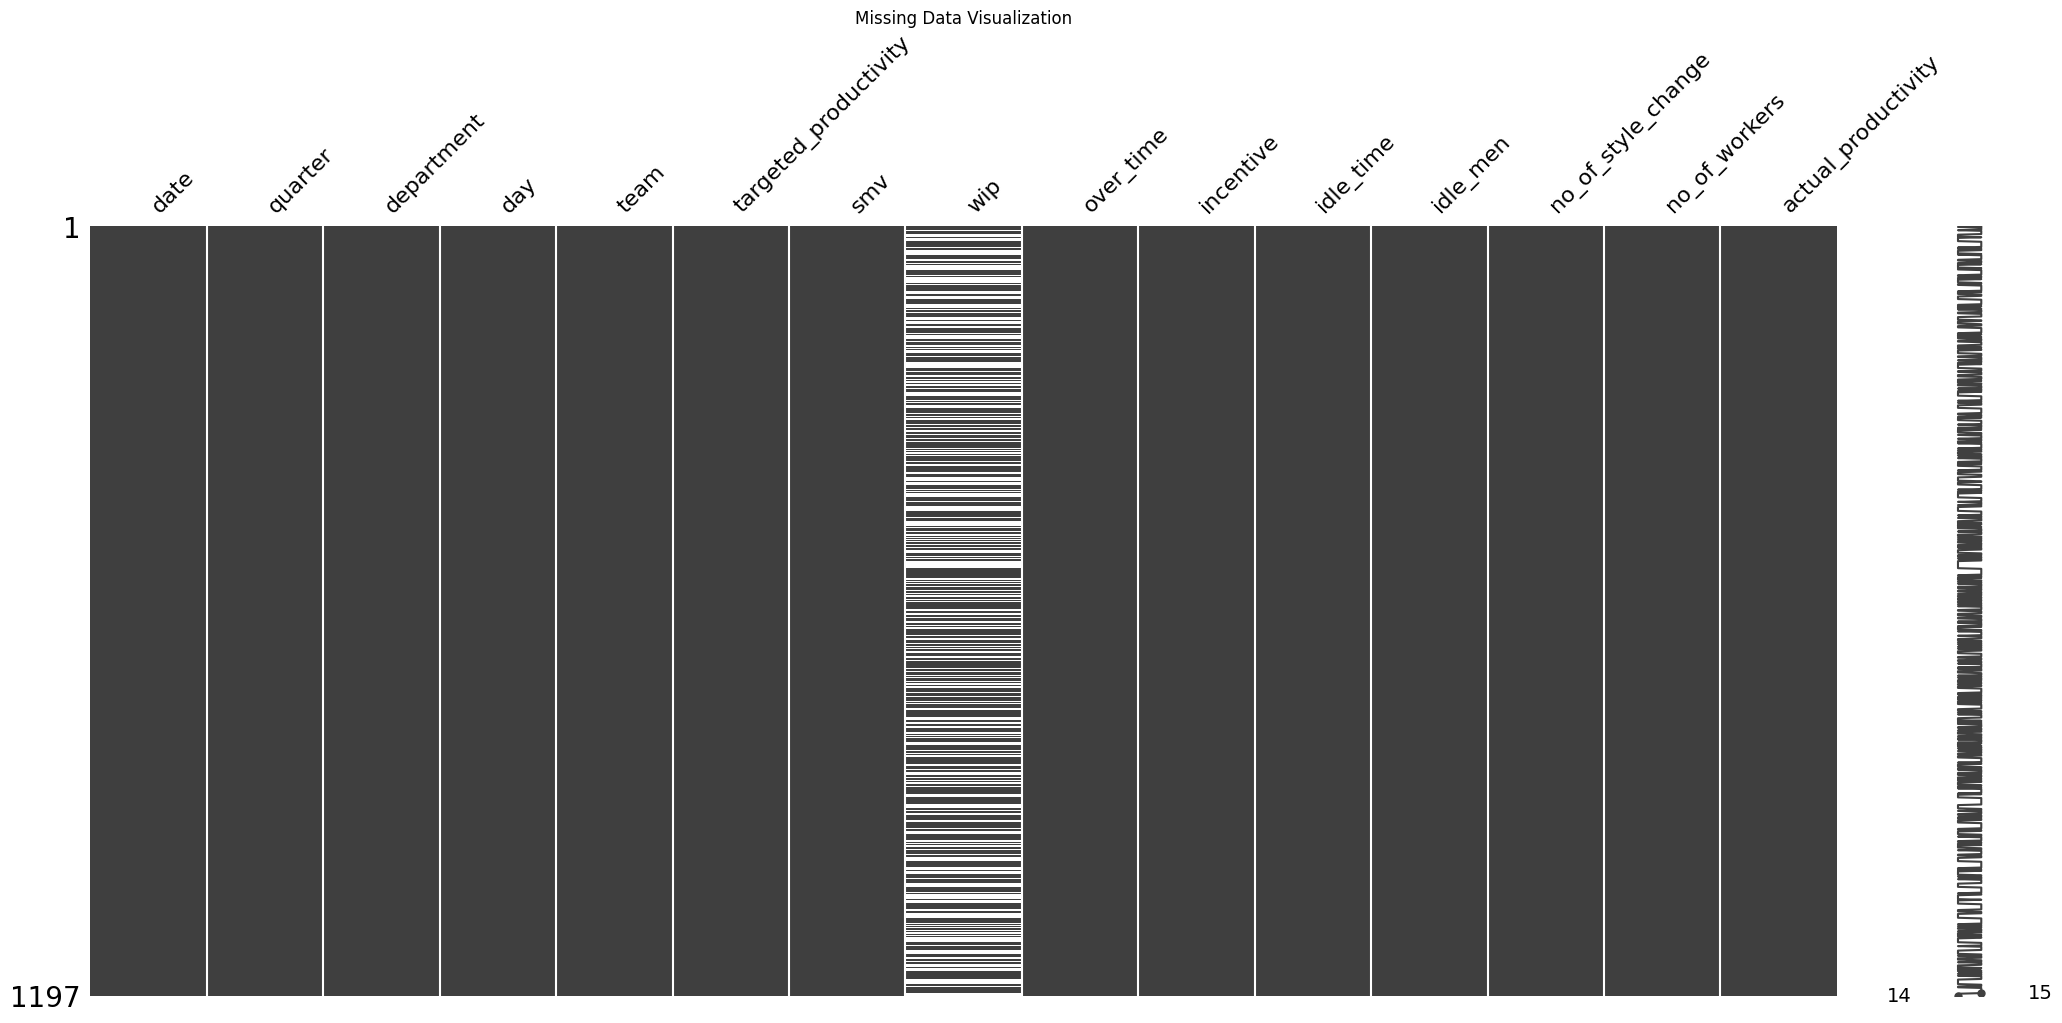

In [4]:
# Count missing values per column
print(df.isnull().sum())

# Visualize missing data
msno.matrix(df)
plt.title('Missing Data Visualization')
plt.show()

The team chose to replace empty cells with zero. This is doable since WIP stands for "work in progress" if the cell is null, it means that there are no projects that are "work in progress", making them null.

In [5]:
# Replace NaN values with 0
df = df.fillna(0)

# Replace empty strings with 0
df = df.replace('', 0)

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64


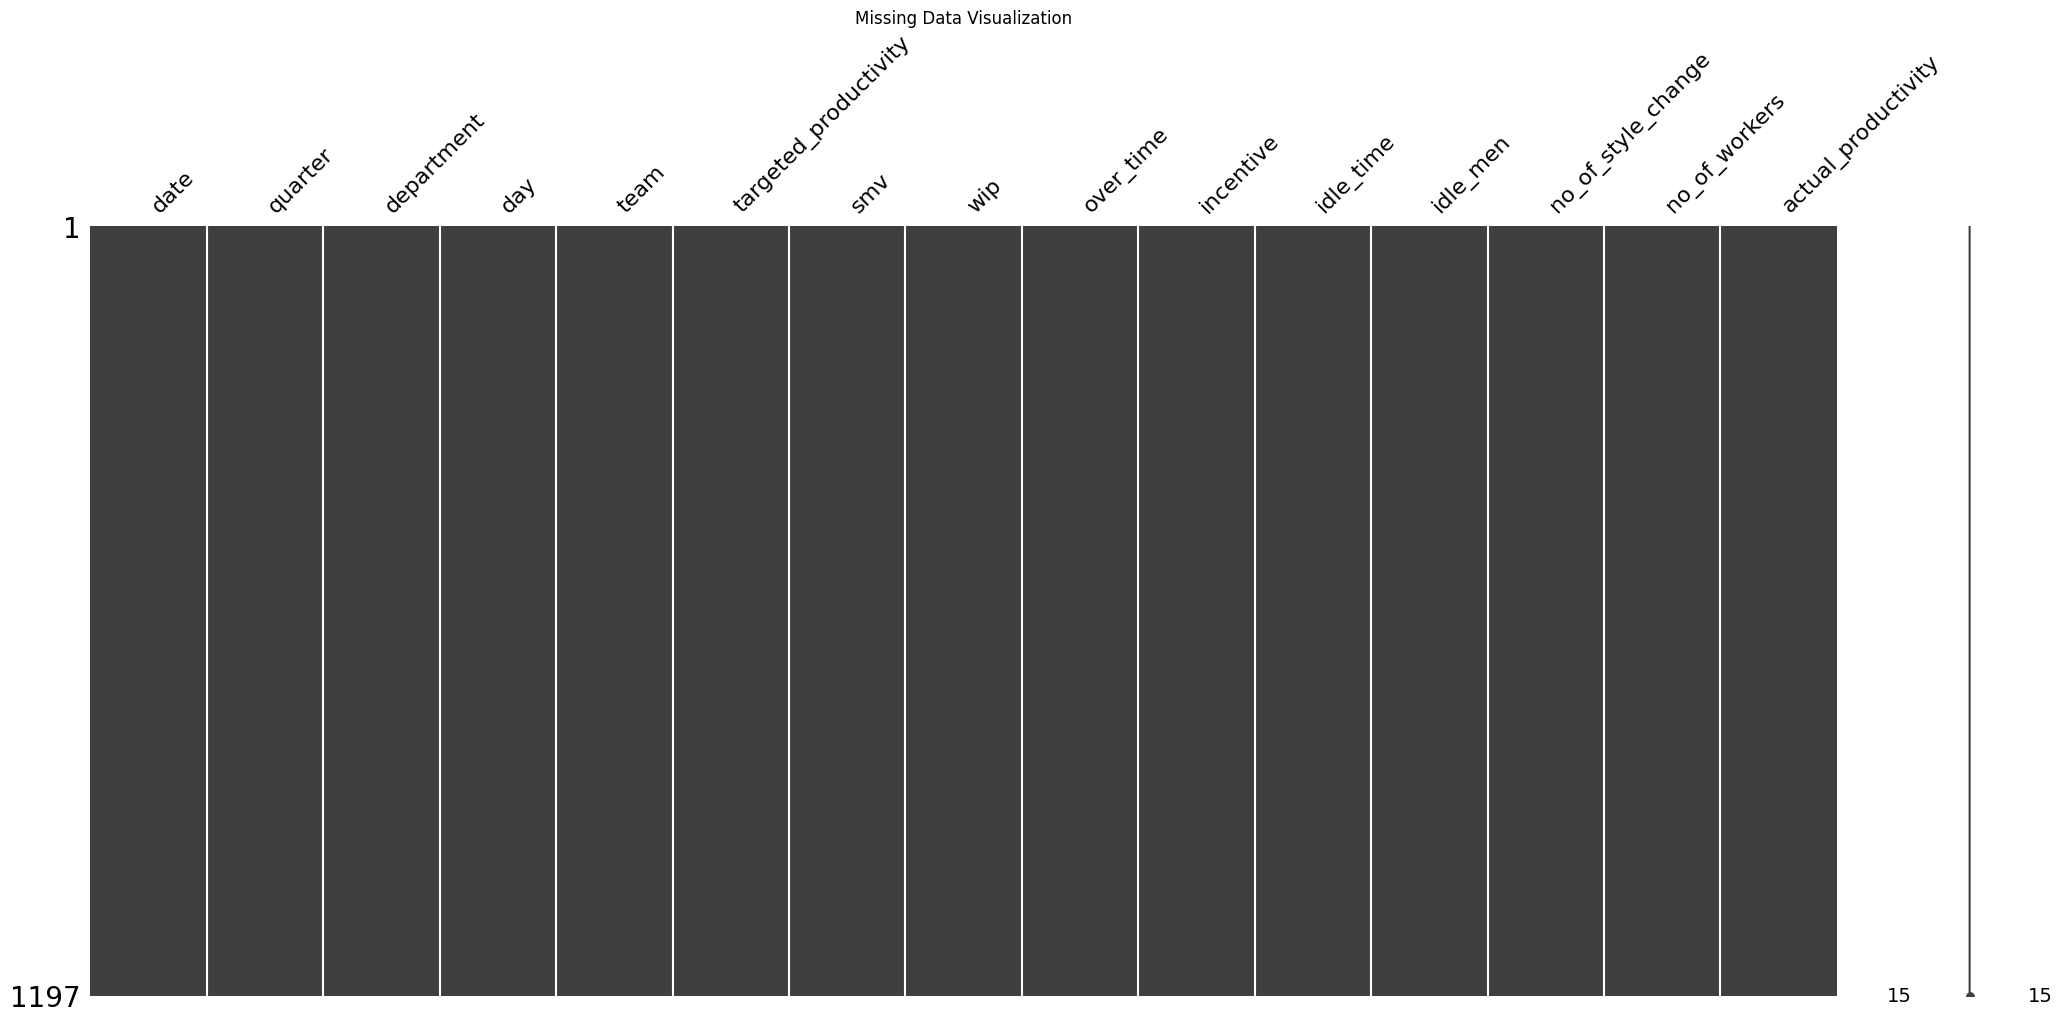

In [6]:
# Count missing values per column
print(df.isnull().sum())

# Visualize missing data
msno.matrix(df)
plt.title('Missing Data Visualization')
plt.show()

Here we're making sure that the dataset does not have any more null cells.

Afterwards, we normalize the values to make sure that all numerical features have the same impact on the model.

In [7]:
# MODIFIED BY MATT

# true_numeric_columns = ['over_time', 'smv', 'wip', 'incentive', 'idle_time', 'idle_men', 
#                         'no_of_style_change', 'no_of_workers']

# numeric_columns = df[true_numeric_columns]

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Normalize the numeric columns and update the DataFrame
# df[numeric_columns.columns] = scaler.fit_transform(numeric_columns)

#modified by matt to get scaler for denormalization
true_numeric_columns = ['over_time', 'smv', 'wip', 'incentive', 'idle_time', 'idle_men', 
                        'no_of_style_change', 'no_of_workers']

everything_else_columns = ['smv', 'wip', 'incentive', 'idle_time', 'idle_men', 
                        'no_of_style_change', 'no_of_workers']

numeric_columns = df[true_numeric_columns]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# added by matt
over_time_scaler = MinMaxScaler() # Separate scaler so we can use it later for denormalization
df['over_time'] = over_time_scaler.fit_transform(df[['over_time']])

# Normalize the non-over_time numeric columns and update the DataFrame
df[everything_else_columns] = scaler.fit_transform(df[everything_else_columns])

joblib.dump(over_time_scaler, 'over_time_scaler.pkl')

['over_time_scaler.pkl']

After normalizing the values, we move on to adding some columns to help with parsing through data.

In [8]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.month  # Extract the month

Finally, we move on to looking at the data itself and see what does it mean to this certain fashion haus.

# Exploring the data

Firstly, we look at the distribution of each numerical data and see what it means to the data itself.

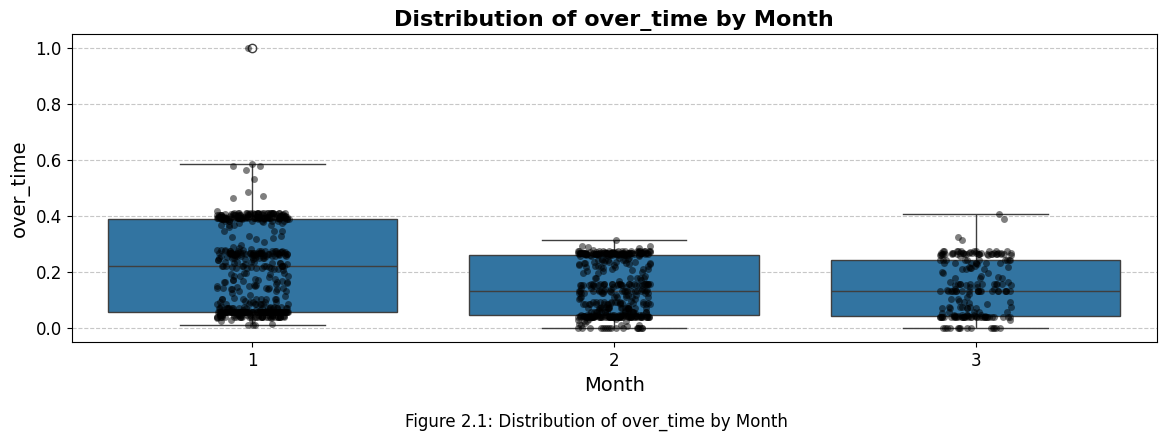

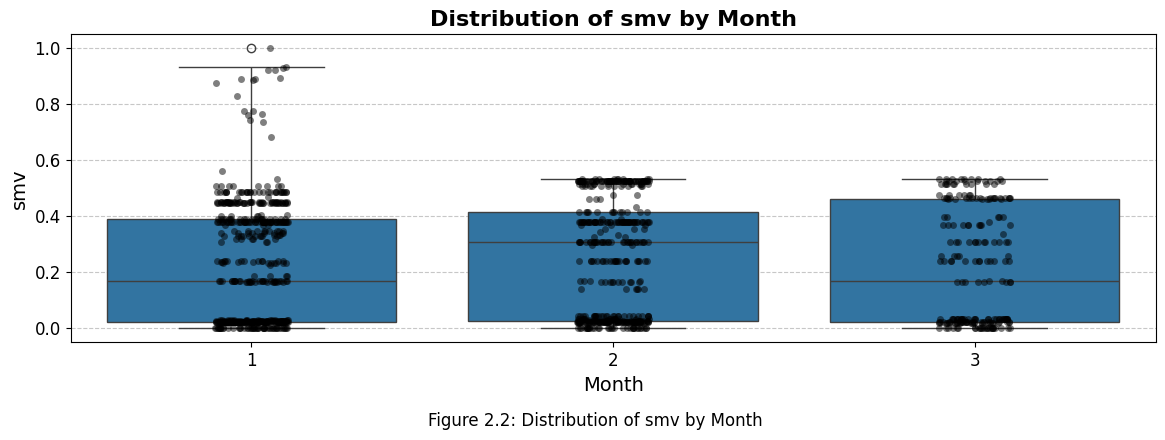

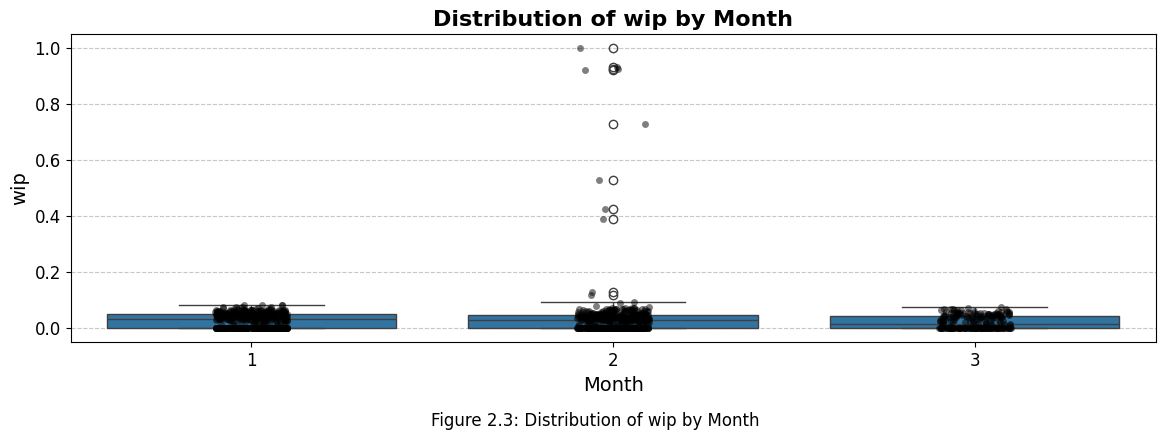

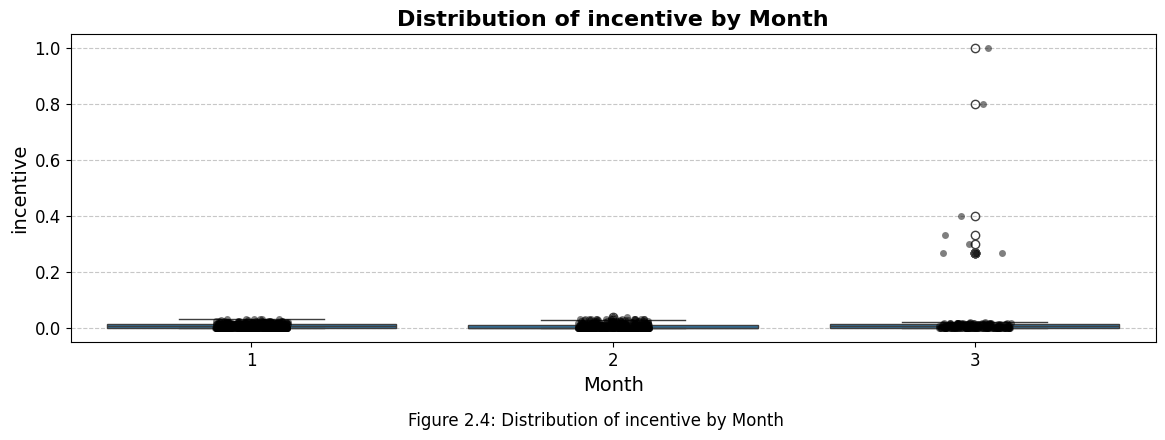

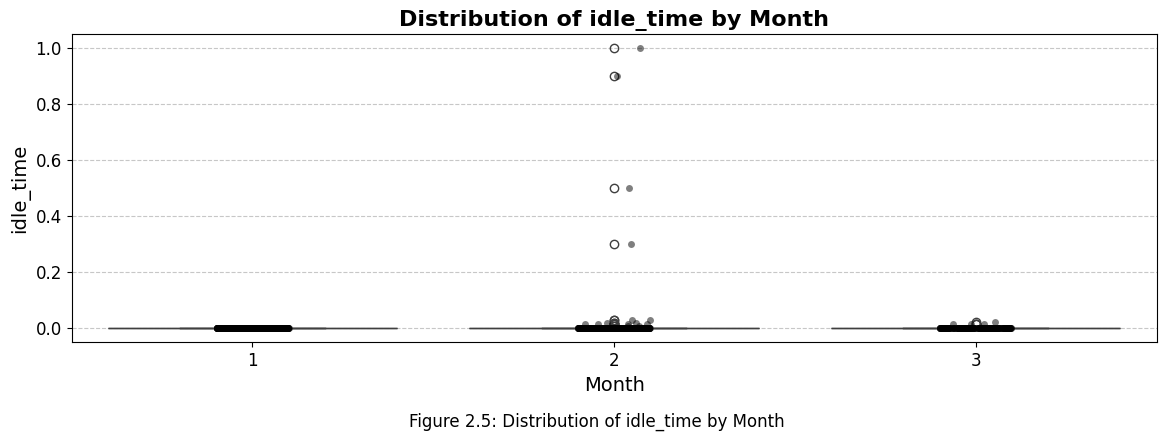

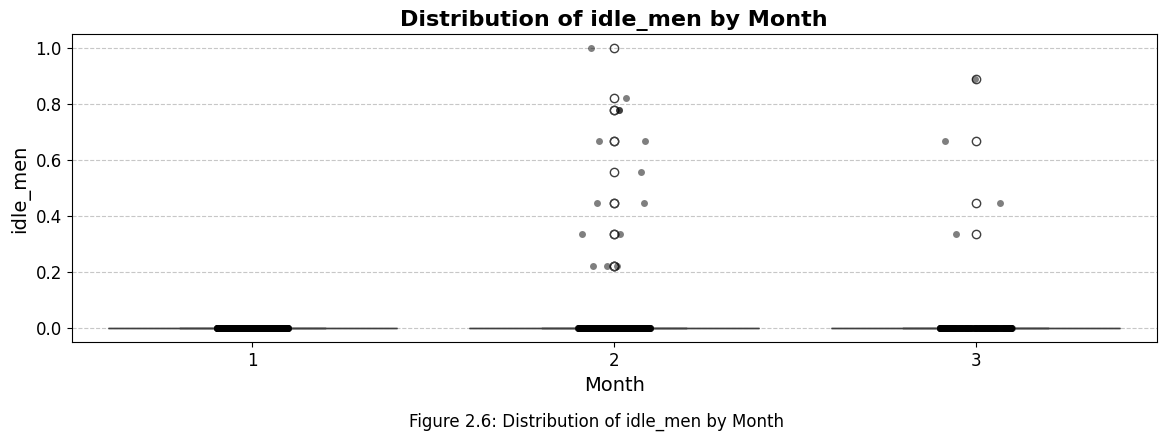

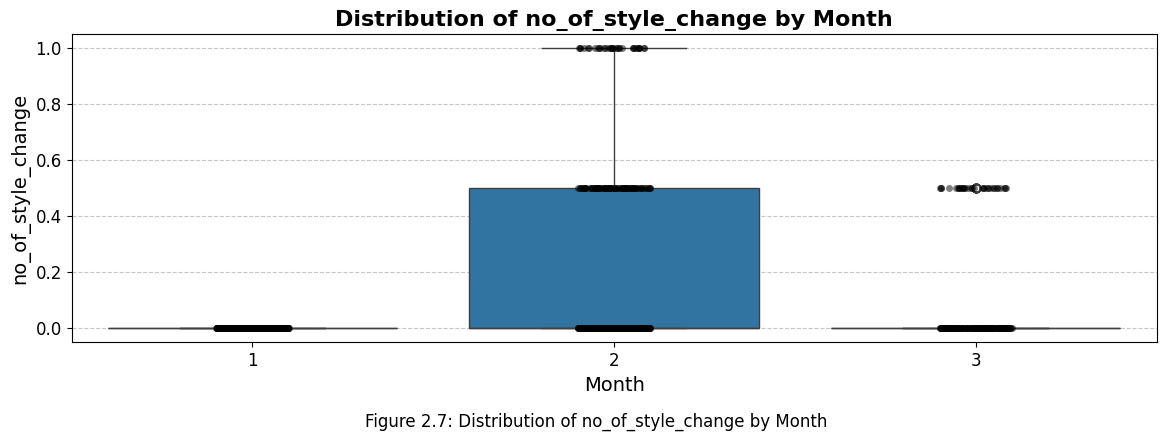

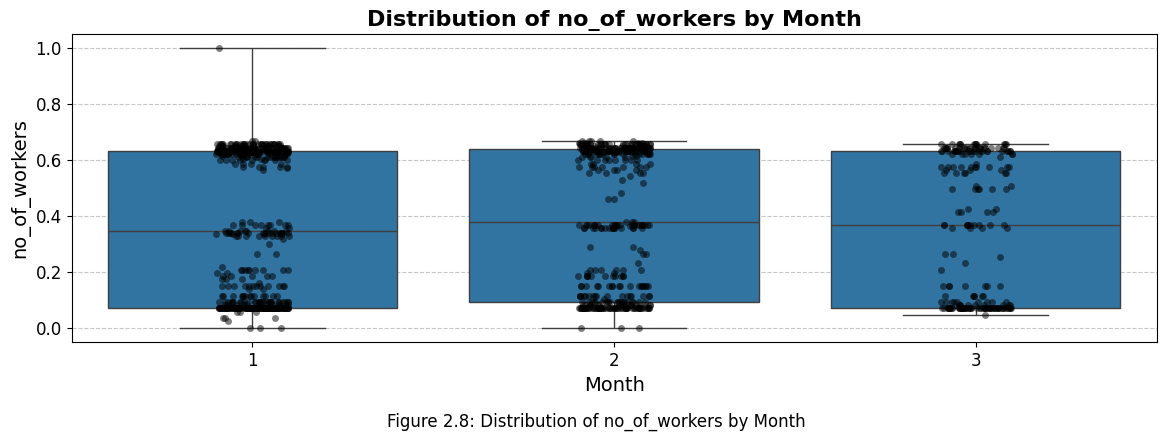

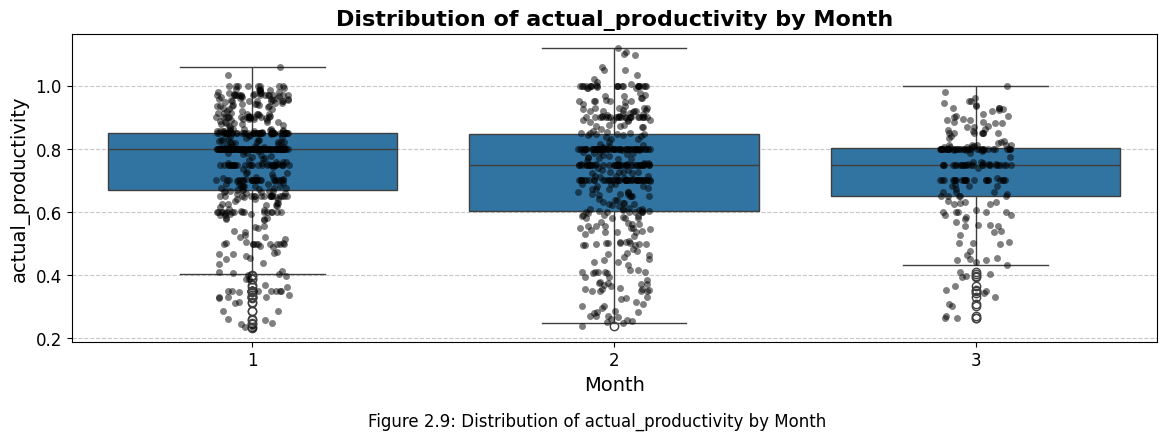

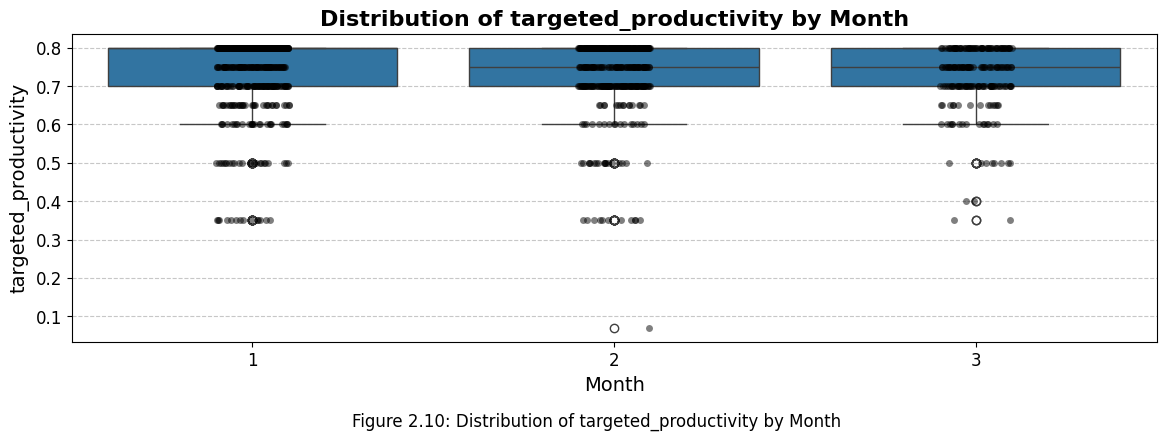

In [9]:
true_numeric_columns = ['over_time', 'smv', 'wip', 'incentive', 'idle_time', 'idle_men', 
                        'no_of_style_change', 'no_of_workers', 'actual_productivity', 'targeted_productivity']

# Ensure output directory exists
output_dir = "figures"
os.makedirs(output_dir, exist_ok=True)

# Starting figure number
figure_number = 2.1

# Starting figure number
major_figure_number = 2  # Represents the major part (e.g., 2.x)
minor_figure_number = 1  # Represents the minor part (e.g., x.1)

# Visualize distributions of numeric columns
for col in true_numeric_columns:
    figure_number = f"{major_figure_number}.{minor_figure_number}" # Combine major and minor figure numbers for the filename
    plt.figure(figsize=(14, 4))  # Adjust figure size
    sns.boxplot(x='month', y=col, data=df, showfliers=True)  # Boxplot
    sns.stripplot(x='month', y=col, data=df, color='black', alpha=0.5, jitter=0.1, dodge=False)  # Reduced jitter
    plt.title(f'Distribution of {col} by Month', fontsize=16, fontweight='bold')  # Title
    plt.xlabel('Month', fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability
    plt.figtext(0.5, -0.1, f"Figure {figure_number}: Distribution of {col} by Month", ha='center', fontsize=12) # Add figure label as a caption
    
    
    figure_filename = os.path.join(output_dir, f"Figure_{figure_number}.png")
    plt.savefig(figure_filename, bbox_inches='tight')
    
    # Increment the minor figure number
    minor_figure_number += 1
    
    plt.show()


As shown in Figure 2.1, it shows the distribution of over time per month. The chart shows different patterns in overtime hours over three months. In Month 1, the median overtime is higher and more varied than in Months 2 and 3. This might mean there's a seasonal pattern, like a busy time with more work or production, possibly due to certain needs or deadlines. Also, some extreme values in Month 1, almost reaching the highest possible overtime of 1.0, could be due to unusual events, like sudden staff shortages or urgent project needs, causing some workers or days to have much higher overtime.

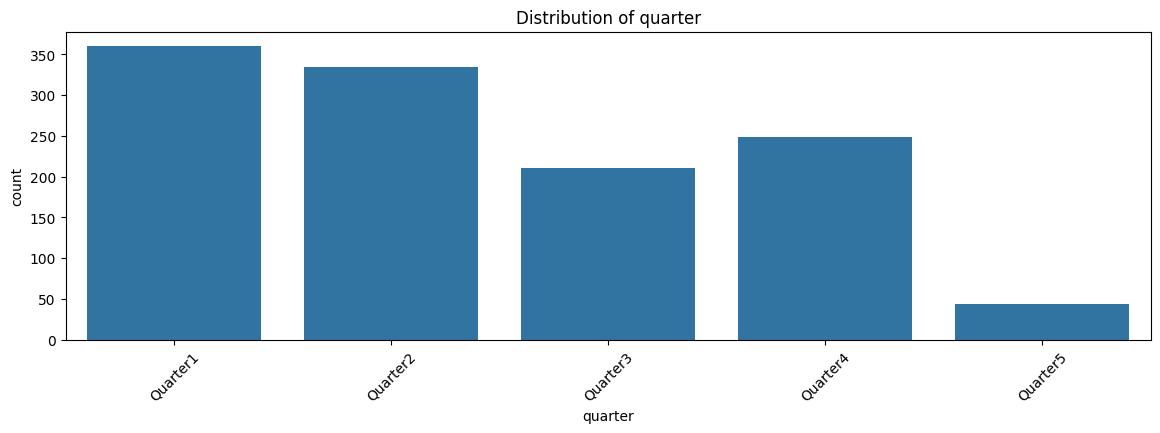

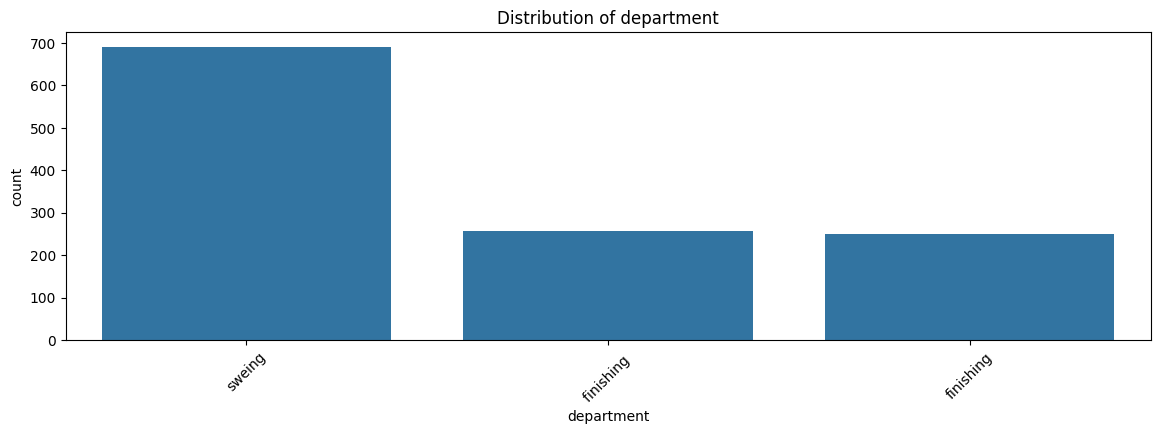

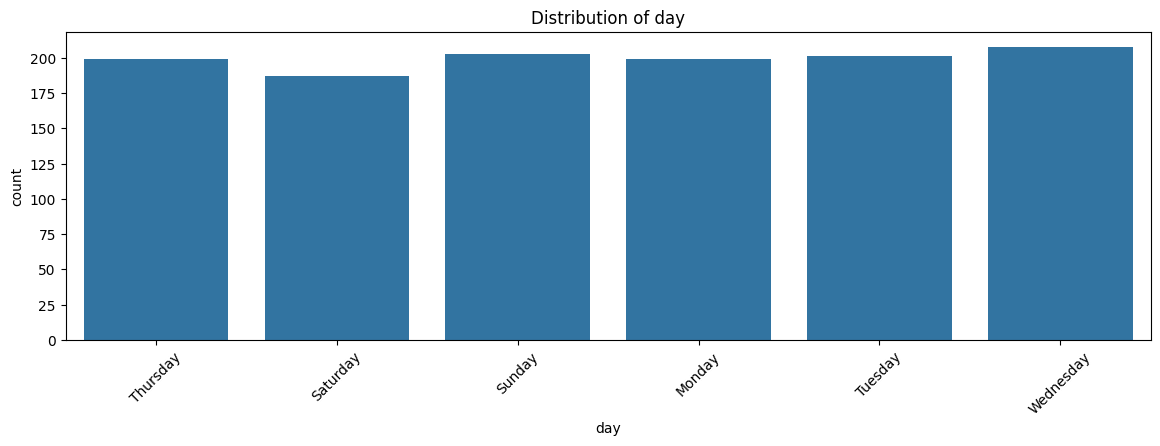

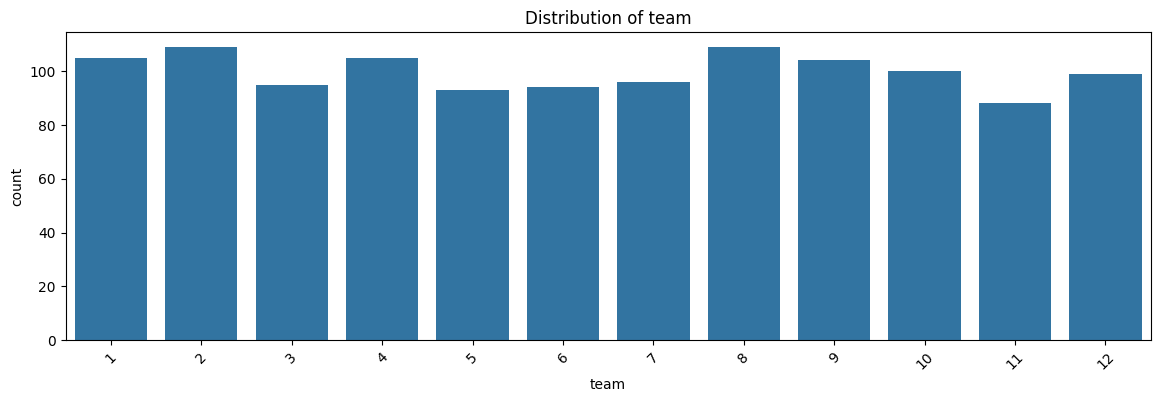

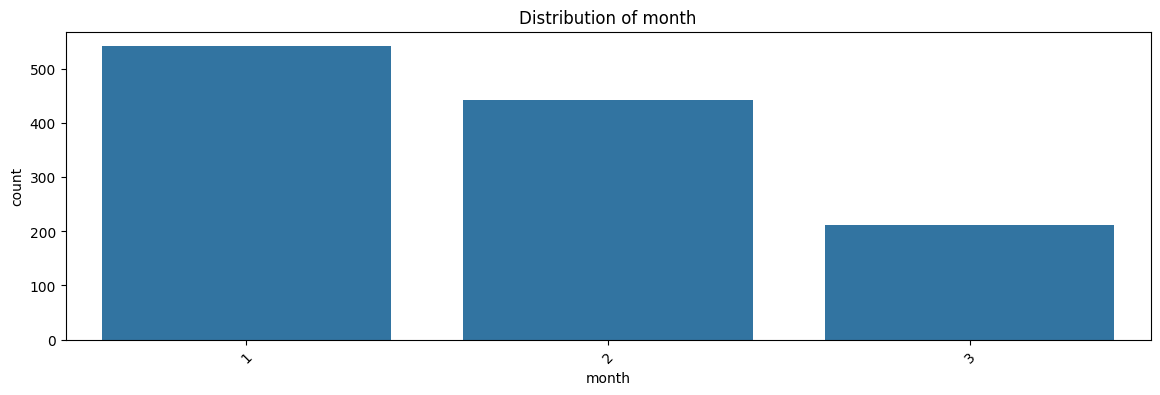

In [10]:
# Create a list of columns excluding the true numeric ones
remaining_columns = [col for col in df.columns if col not in true_numeric_columns and col != 'date']

# Filter the remaining categorical columns (assuming they're not numeric)
categorical_columns = df[remaining_columns]

# Check unique values and distributions for the remaining categorical features
for col in categorical_columns:
    plt.figure(figsize=(14, 4))  # Width: 14 inches, Height: 8 inches
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

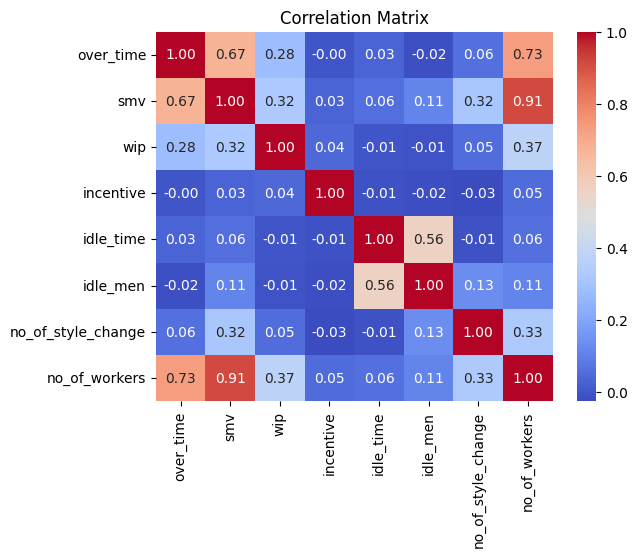

Correlation with Overtime:
 over_time             1.000000
no_of_workers         0.734164
smv                   0.674887
wip                   0.276529
no_of_style_change    0.059790
idle_time             0.031038
incentive            -0.004793
idle_men             -0.017913
Name: over_time, dtype: float64


In [11]:
# Correlation matrix
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Correlations with 'over_time'
correlation_with_overtime = numeric_columns.corr()['over_time'].sort_values(ascending=False)
print("Correlation with Overtime:\n", correlation_with_overtime)


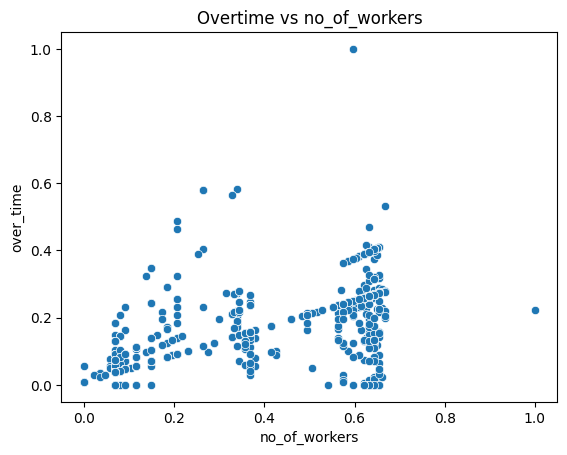

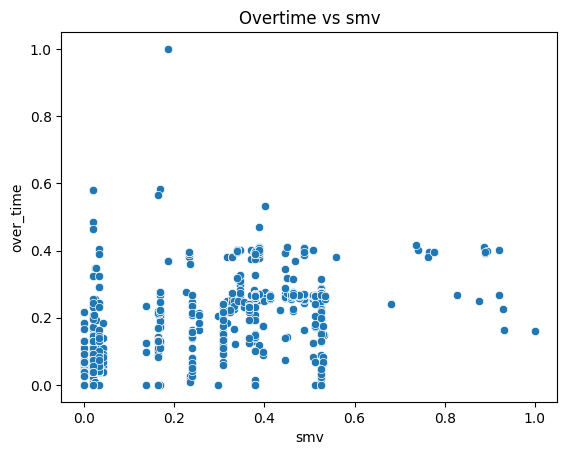

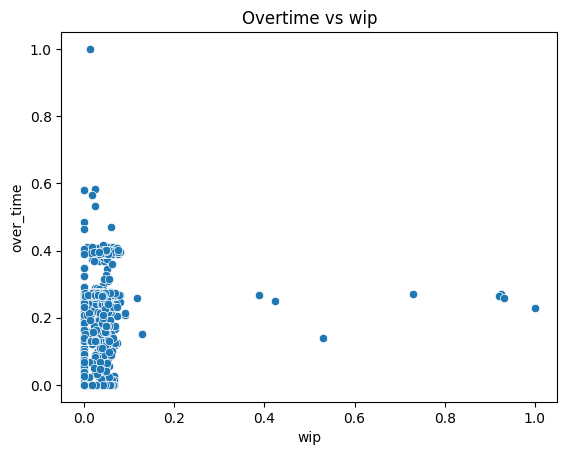

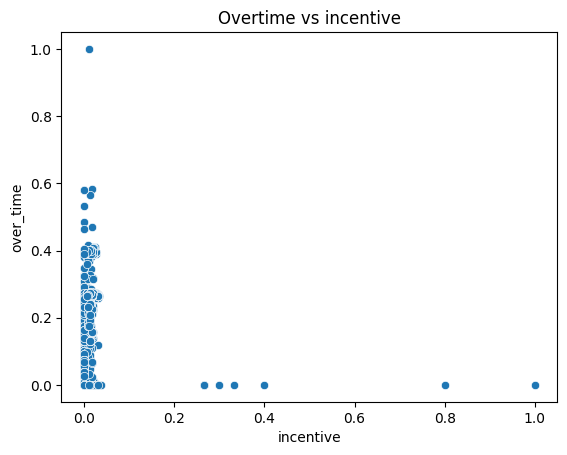

In [12]:
# Scatterplots for numeric columns
for col in ['no_of_workers', 'smv', 'wip', 'incentive']:
    sns.scatterplot(x=col, y='over_time', data=df)
    plt.title(f'Overtime vs {col}')
    plt.show()


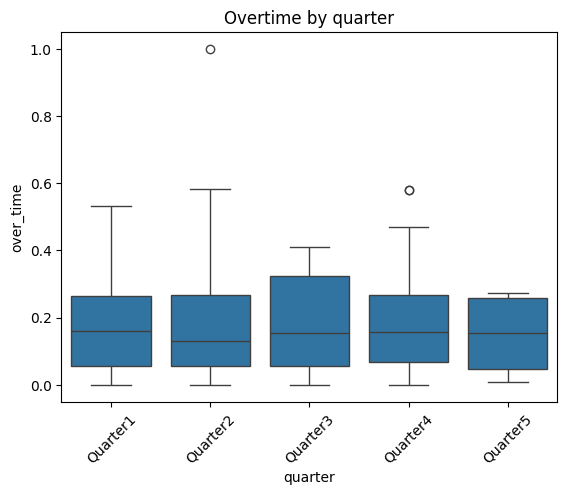

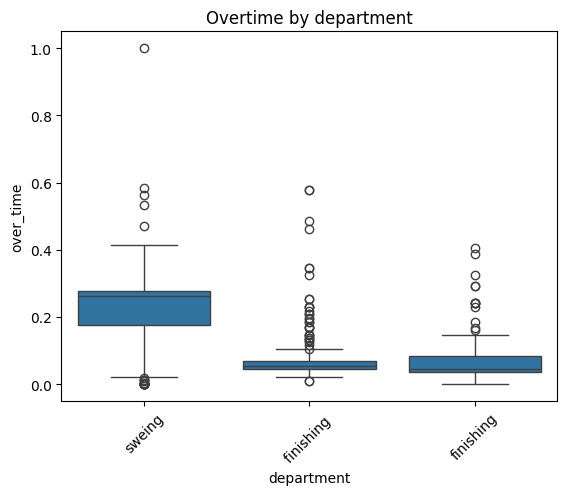

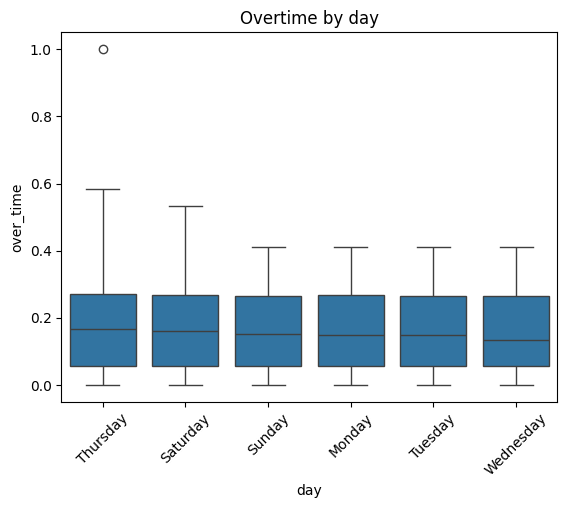

In [13]:
# Boxplots for categorical features
for col in ['quarter', 'department', 'day']:
    sns.boxplot(x=col, y='over_time', data=df)
    plt.title(f'Overtime by {col}')
    plt.xticks(rotation=45)
    plt.show()


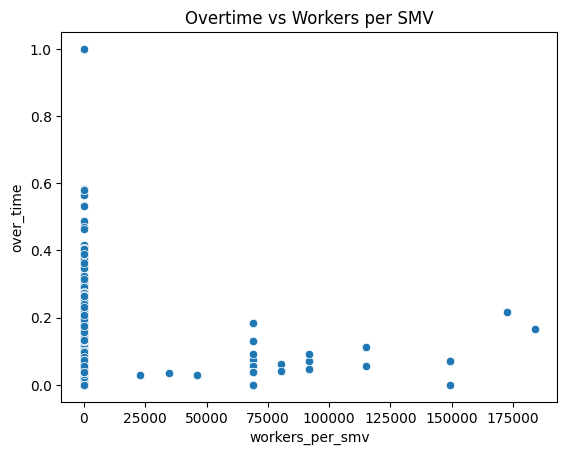

         over_time           targeted_productivity actual_productivity
              mean       std                  mean                mean
quarter                                                               
Quarter1  0.172875  0.111714              0.744083            0.751560
Quarter2  0.168018  0.140886              0.732090            0.743710
Quarter3  0.188889  0.140572              0.721190            0.704759
Quarter4  0.187162  0.129010              0.714516            0.709067
Quarter5  0.143729  0.105291              0.718182            0.826177


In [14]:
# Interaction terms (e.g., workers_per_smv)
df['workers_per_smv'] = df['no_of_workers'] / (df['smv'] + 1e-6)
sns.scatterplot(x='workers_per_smv', y='over_time', data=df)
plt.title('Overtime vs Workers per SMV')
plt.show()

# Group-Wise Analysis
grouped = df.groupby('quarter').agg({
    'over_time': ['mean', 'std'],
    'targeted_productivity': ['mean'],
    'actual_productivity': ['mean']
})
print(grouped)


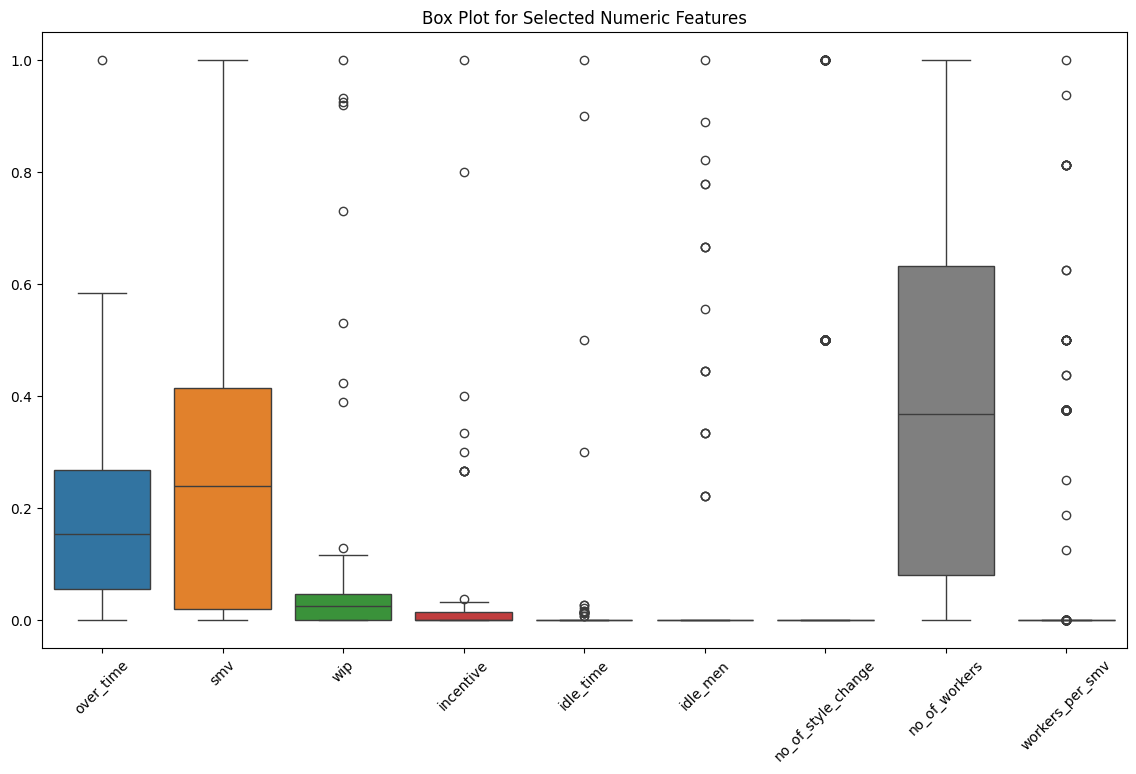

Outliers:
           date   quarter  department       day  team  targeted_productivity  \
138 2015-01-08  Quarter2      sweing  Thursday    12                   0.80   
139 2015-01-08  Quarter2      sweing  Thursday     6                   0.80   
146 2015-01-08  Quarter2      sweing  Thursday    11                   0.35   
383 2015-01-22  Quarter4  finishing   Thursday     1                   0.70   
384 2015-01-22  Quarter4  finishing   Thursday     2                   0.70   

          smv       wip  over_time  incentive  idle_time  idle_men  \
138  0.168602  0.023700   0.583333   0.017500        0.0       0.0   
139  0.164731  0.017775   0.564815   0.013889        0.0       0.0   
146  0.186218  0.012412   1.000000   0.010556        0.0       0.0   
383  0.020132  0.000000   0.578704   0.000000        0.0       0.0   
384  0.020132  0.000000   0.578704   0.000000        0.0       0.0   

     no_of_style_change  no_of_workers  actual_productivity  month  \
138                 0.0

In [15]:
# Normalize the 'workers_per_smv' column
df['workers_per_smv'] = scaler.fit_transform(df[['workers_per_smv']])

# Define the columns to include in the boxplot
selected_columns = ['over_time', 'smv', 'wip', 'incentive', 'idle_time', 'idle_men', 
                    'no_of_style_change', 'no_of_workers', 'workers_per_smv']

# Boxplot for selected numeric features
plt.figure(figsize=(14, 8))  # Width: 14 inches, Height: 8 inches
sns.boxplot(data=df[selected_columns])  # Use only the selected columns
plt.title('Box Plot for Selected Numeric Features')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Z-score method for outlier detection
df['z_score'] = zscore(df['over_time'])
outliers = df[df['z_score'].abs() > 3]
print("Outliers:\n", outliers)


C:\Users\mkyod\AppData\Local\Temp\ipykernel_29624\2967914280.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['over_time'].resample('M').mean().plot()


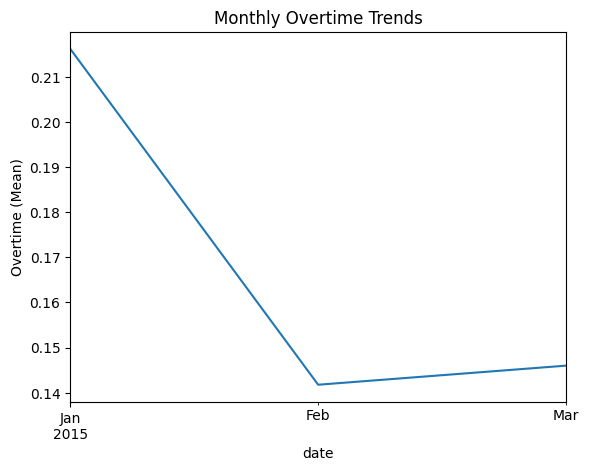

In [16]:
# Trends over time
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

df['over_time'].resample('M').mean().plot()
plt.title('Monthly Overtime Trends')
plt.ylabel('Overtime (Mean)')
plt.show()


In [17]:
# Remove leading and trailing whitespace from the 'department' column
df['department'] = df['department'].str.strip()

**!!! Note for those who will merge !!!** My model 2 code requires "import joblib" at the start of the nb and the cell below to work :))

In [18]:
# everything needed pre-model 2 is in this cell!

# import joblib

# over_time_scaler = MinMaxScaler()
# df['over_time'] = over_time_scaler.fit_transform(df[['over_time']])
# joblib.dump(over_time_scaler, 'over_time_scaler.pkl')

# [MODEL 2] Predicting overtime using a neural network (Matthew Ong)

In this section, we will be predicting *over_time* using a PyTorch neural network, which we will build as we go along. We will be using all of the other columns from the dataset as the model's features, with the exception of date (which will be explained later).

The reason we chose a neural network as one of our machine learning models for this problem is because, as seen in the EDA, **many features in the dataset individually have little-to-no correlation with *over_time***. While this might typically pose a challenge, **neural networks are able to capture the subtle, non-linear relationships** that might exist where a combination of those features might have a much bigger impact than any one of them alone. Its ability to learn such patterns is the main reason we are using a neural network.

Let us first import all the needed modules.

In [19]:
from sklearn.model_selection import train_test_split, KFold
import torch.optim as optim
import torch.nn as nn
import torch
from garments import DataLoader
import numpy as np
from scipy.stats import skew
import time

**Data preparation**

From our dataframe with the preprocessed data, we'll assign the features to *X* and the target (over_time) to *y*. 

We will not be including the date feature as we feel that it isn't meaningful to the model as is. Additionally, the year component is irrelevant since all records are from the same year anyway (2015). Instead, the network will be using the derived **month column** alongside the quarter and day columns to capture any potential temporal trends.

We also remove the columns added during EDA, namely z_score and workers_per_smv.

In [20]:
df_nn = df.reset_index() # remove the date as index
X = df_nn.drop(columns=['over_time', 'z_score', 'workers_per_smv', 'date'])
y = df_nn['over_time']

In [21]:
#debugging
print(X.shape)
print(X)
print(y.shape)
print(y)

(1197, 14)
       quarter department        day  team  targeted_productivity       smv  \
0     Quarter1     sweing   Thursday     8                   0.80  0.450252   
1     Quarter1  finishing   Thursday     1                   0.75  0.020132   
2     Quarter1     sweing   Thursday    11                   0.80  0.164731   
3     Quarter1     sweing   Thursday    12                   0.80  0.164731   
4     Quarter1     sweing   Thursday     6                   0.80  0.445219   
...        ...        ...        ...   ...                    ...       ...   
1192  Quarter2  finishing  Wednesday    10                   0.75  0.000000   
1193  Quarter2  finishing  Wednesday     8                   0.70  0.019357   
1194  Quarter2  finishing  Wednesday     7                   0.65  0.019357   
1195  Quarter2  finishing  Wednesday     9                   0.75  0.000000   
1196  Quarter2  finishing  Wednesday     6                   0.70  0.000000   

           wip  incentive  idle_time  id

Next, we need to one-hot encode the categorical features (quarter, department, and day) because neural networks can only work with numerical data.

In [22]:
X = pd.get_dummies(X, columns=['quarter', 'department', 'day'])
X = X.astype(float) # convert the True/False into 1/0

In [23]:
#debugging
print(X.shape)
print(X.columns)

(1197, 24)
Index(['team', 'targeted_productivity', 'smv', 'wip', 'incentive', 'idle_time',
       'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'month', 'quarter_Quarter1', 'quarter_Quarter2',
       'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5',
       'department_finishing', 'department_sweing', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday'],
      dtype='object')


**Train-test-validation split**

We will now divide our data into train, test, and validation sets following a 64-20-16 split.

In [24]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split (X_train, y_train, test_size=0.2, random_state=0)

In [25]:
#debugging
print("Train set:")
print(X_train.shape)
print(y_train.shape)
print(y_train[:10])
print("\nTest set:")
print(X_test.shape)
print(y_test.shape)
print(y_test[:10])
print("\nValidation set:")
print(X_val.shape)
print(y_val.shape)
print(y_val[:10])

Train set:
(765, 24)
(765,)
130     0.409722
2       0.141204
1171    0.037037
120     0.406250
452     0.236111
1036    0.129630
932     0.268519
1154    0.037037
410     0.392361
600     0.263889
Name: over_time, dtype: float64

Test set:
(240, 24)
(240,)
700     0.157407
621     0.101852
319     0.069444
837     0.037037
761     0.087963
592     0.222222
1049    0.041667
124     0.381944
251     0.282407
531     0.046296
Name: over_time, dtype: float64

Validation set:
(192, 24)
(192,)
169     0.055556
291     0.055556
302     0.211806
765     0.037037
1149    0.000000
245     0.392361
793     0.152778
262     0.055556
140     0.406250
970     0.171296
Name: over_time, dtype: float64


The train, test, and validation data are converted from pandas DataFrames into PyTorch tensors for use in the neural network later. Conversion to numpy arrays is an intermediate step as there is no direct conversion between DFs and tensors.

In [26]:
X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32)
X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float32)
X_val = torch.tensor(X_val.to_numpy(), dtype=torch.float32)
y_val = torch.tensor(y_val.to_numpy(), dtype=torch.float32)

**Setting up the neural network**

Now that the data has been processed and split into train, test, and validation, we can now set up the neural network. Before that, we will use DataLoader to batch our training data as we will be performing mini-batch gradient descent.

In [27]:
train_dataloader = DataLoader(X_train, y_train, 16)

We then define a class with the functions needed to build the neural network. This was taken from Lab 5 but with modifications made to suit regression and our particular task. These modifications include changing the hidden layer activation function to ReLU, removing the softmax layer, changing initialization to He, etc.

In [28]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, num_classes, list_hidden):
        super(NeuralNetwork, self).__init__()
        
        self.input_size = input_size
        self.num_classes = num_classes
        self.list_hidden = list_hidden

    def create_network(self):
        layers = []
        layers.append(torch.nn.Linear(in_features=self.input_size, out_features=self.list_hidden[0]))
        layers.append(nn.ReLU()) # made it always use ReLu as the activation function for hidden layers

        for i in range(len(self.list_hidden) - 1):
            layers.append(torch.nn.Linear(in_features=self.list_hidden[i], out_features=self.list_hidden[i+1]))
            layers.append(nn.ReLU()) # made it always use ReLu as the activation function for hidden layers

        layers.append(torch.nn.Linear(in_features=self.list_hidden[-1], out_features=1)) # made output neuron always one
        self.layers = nn.Sequential(*layers) # removed softmax layer

    def init_weights(self):
        torch.manual_seed(2)
        
        for module in self.modules():
            if isinstance(module, nn.Linear):
                nn.init.kaiming_normal_(module.weight, mode='fan_in', nonlinearity='relu') # changed initialization to He since we're using ReLU
                nn.init.constant_(module.bias, 0)

    def forward(self, x, verbose=False):

        for i, layer in enumerate(self.layers):
            x = layer(x)

        if verbose:
            print(f'Output of layer {i}:', x, '\n')

        return x  # final output for regression

Next, we prepare the different hyperparameter variations that we will be considering for tuning. In this problem, we will be tuning the neural network structure (the number of hidden layers and nodes in each hidden layer) and the ADAM optimizer learning rate.

In [29]:
network_structures = [[8], [16,], [32], [16, 8], [32, 16], [32, 16, 8]]
adam_learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001]

We also set our loss function to Mean Squared Error (MSE) as it is a common choice for regression tasks.

In [30]:
criterion = nn.MSELoss()

We use everything we've just defined to build a *train_and_validate* function that allows us to train the model on the training data, then test it on the validation data. The different configurations of network structure + optimizer learning rate will be **compared based on their validation set loss**, and the configuration with the lowest loss will be selected as the optimum setup.

In [31]:
def train_and_validate (train_dataloader, X, y, learning_rate, network_structure, test=False, verbose=False):
    max_epochs = 300
    min_change = 0.000003
    this_epoch = 0
    is_converged = False
    prev_loss = 0.0
    
    ann = NeuralNetwork(input_size=24, num_classes=1, list_hidden=network_structure) # we will tune the network structure
    ann.create_network() # builds the neural network
    ann.init_weights() # initializes the weights according to He initialization
    
    optimizer = optim.Adam(ann.parameters(), lr=learning_rate) # we will tune the learning rate

    # train the model
    ann.train() # sets the model to train mode
    while this_epoch < max_epochs and is_converged is not True:
        this_loss = 0.0
        
        for X_batch, y_batch in zip(*train_dataloader.get_batch(mode='train')):
            optimizer.zero_grad() # empties the gradients
            scores = ann.forward(X_batch) # forward propagation
            loss = criterion(scores, y_batch.view(-1, 1)) # get the loss
            loss.backward() # backpropagation
            optimizer.step() # update the weights
            
            this_loss += loss.item()

        average_loss = this_loss / len(X_batch)

        if abs(prev_loss - average_loss) < min_change: # stop training early if the change in loss is less than a given minimum
            is_converged = True
            print(f"Training stopped early due to convergence (Epoch: {this_epoch + 1}).")
            print(f"Loss difference vs previous epoch: {abs(prev_loss - average_loss):.10f}")
            break
        
        else:
            prev_loss = average_loss
            this_epoch+=1

        if verbose:
            print(f'Epoch {this_epoch}/{max_epochs}, Loss: {average_loss}')


    # evaluate the model (using the validation set)
    ann.eval()

    with torch.no_grad(): # PyTorch doesn't need to track gradients since we're just evaluating (no updating weights)
        final_scores = ann.forward(X)
        final_loss = criterion(final_scores, y.view(-1, 1))
        
    if test is False:
        print(f"Validation Loss: {final_loss}")
        return final_loss  

    else:
        print(f"Test Loss: {final_loss}")

    return final_loss, final_scores

Now we can perform our hyperparameter tuning proper where we will call our *train_and_validate* function multiple times, each time with a different combination of network structure and optimizer learning rate. The one which produces the best validation set loss will be used in our final model.

In [32]:
def hyperparam_tuning ():
    best_val_loss = 100000
    best_network_structure = None
    best_adam_learning_rate = None
    
    start_time = time.time()
    
    for learning_rate in adam_learning_rates:
        for structure in network_structures:
            print(f"Learning rate: {learning_rate} & Network structure: {structure}")
            val_loss = train_and_validate(train_dataloader, X_val, y_val, learning_rate, structure, verbose=False) # getting each configuration's val loss
    
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_adam_learning_rate = learning_rate
                best_network_structure = structure
                
    end_time = time.time()
    training_time = end_time - start_time
    
    print(f"Best Learning Rate: {best_adam_learning_rate}")
    print(f"Best Hidden Layer Configuration: {best_network_structure}")
    print(f"Best Validation Loss: {best_val_loss}")
    print(f"Total hyperparameter tuning time: {training_time:.2f} seconds")

    return best_adam_learning_rate, best_network_structure

In [33]:
best_adam_learning_rate, best_network_structure = hyperparam_tuning()

Learning rate: 0.1 & Network structure: [8]
Training stopped early due to convergence (Epoch: 34).
Loss difference vs previous epoch: 0.0000018409
Validation Loss: 0.005854600574821234
Learning rate: 0.1 & Network structure: [16]
Validation Loss: 0.0074755423702299595
Learning rate: 0.1 & Network structure: [32]
Validation Loss: 0.010929246433079243
Learning rate: 0.1 & Network structure: [16, 8]
Validation Loss: 0.008754128590226173
Learning rate: 0.1 & Network structure: [32, 16]
Validation Loss: 0.01964404247701168
Learning rate: 0.1 & Network structure: [32, 16, 8]
Validation Loss: 0.019985990598797798
Learning rate: 0.01 & Network structure: [8]
Validation Loss: 0.00539304269477725
Learning rate: 0.01 & Network structure: [16]
Training stopped early due to convergence (Epoch: 213).
Loss difference vs previous epoch: 0.0000017771
Validation Loss: 0.005336632952094078
Learning rate: 0.01 & Network structure: [32]
Validation Loss: 0.006162102799862623
Learning rate: 0.01 & Network st

Having performed the hyperparameter tuning, we now know the best network structure and ADAM optimizer learning rate for our model (at least on the validation set). At this point, we can finally train and test our optimized model on the test set using those parameters. Once this is done, we print the loss and the predictions.

In [34]:
start_time = time.time()

test_loss, test_scores = train_and_validate(train_dataloader, X_test, y_test, best_adam_learning_rate, best_network_structure, test=True, verbose=False)

end_time = time.time()
training_time = end_time - start_time
print(f"Final model training and testing time: {training_time:.2f} seconds")

Training stopped early due to convergence (Epoch: 183).
Loss difference vs previous epoch: 0.0000018286
Test Loss: 0.00487551698461175
Final model training and testing time: 5.95 seconds


In [35]:
#debugging
numberOfRows = 10
print(test_loss)
print(test_scores.shape)
print(test_scores[:numberOfRows])

tensor(0.0049)
torch.Size([240, 1])
tensor([[0.1011],
        [0.1258],
        [0.0934],
        [0.0821],
        [0.1222],
        [0.2332],
        [0.0937],
        [0.3630],
        [0.3419],
        [0.0714]])


**Interpreting the result**

How do we interpret the final result? The first thing we have to do is to denormalize the model's predictions using the same scaler that was used to normalize the targets earlier in the notebook. We also denormalize y_test so we can compare the predictions to it in the original scale (minutes).

In [36]:
overtimescaler = joblib.load('over_time_scaler.pkl')
test_scores_denormalized = overtimescaler.inverse_transform(test_scores.reshape(-1, 1))
y_test_denormalized = overtimescaler.inverse_transform(y_test.reshape(-1, 1))

In [37]:
#debugging
numberOfRows = 15
for i in range(numberOfRows):
    print(f"Prediction: {test_scores_denormalized[i]}, True Value: {y_test_denormalized[i]}")

Prediction: [2620.00597], True Value: [4079.99988556]
Prediction: [3261.51346207], True Value: [2639.99997139]
Prediction: [2420.58158398], True Value: [1800.00008583]
Prediction: [2129.20877695], True Value: [960.00000715]
Prediction: [3167.50310898], True Value: [2279.99999285]
Prediction: [6045.56324959], True Value: [5760.00004292]
Prediction: [2427.97804356], True Value: [1080.00003219]
Prediction: [9409.99139786], True Value: [9900.00008583]
Prediction: [8863.31771851], True Value: [7319.99988556]
Prediction: [1851.31374836], True Value: [1199.99996066]
Prediction: [5482.96111107], True Value: [6240.00014305]
Prediction: [4311.68094635], True Value: [2880.00002146]
Prediction: [6630.47913551], True Value: [6840.00017166]
Prediction: [3165.34075499], True Value: [2699.99993563]
Prediction: [4449.88813877], True Value: [2279.99999285]


We also take the square root of the MSE to get the RMSE, then bring it into the original scale (minutes) just like the predictions by denormalizing it. **This value is the amount of minutes the model's predictions are off by, on average.** For example, an RMSE of 500 means that the predictions are usually off by around 500 minutes.

In [38]:
rmse = torch.sqrt(test_loss)
rmse_denormalized = overtimescaler.inverse_transform(rmse.reshape(-1, 1))

In [39]:
#debugging
print(f"MSE: {test_loss}")
print(f"RMSE: {rmse}")
print(f"RMSE denormalized (minutes): {rmse_denormalized}")

MSE: 0.00487551698461175
RMSE: 0.06982490420341492
RMSE denormalized (minutes): [[1809.86151695]]


Now we can visualize how the predictions compare to the correct answers by using a scatterplot. Each blue dot represents a prediction, and their distance from the red line is the error or RMSE.

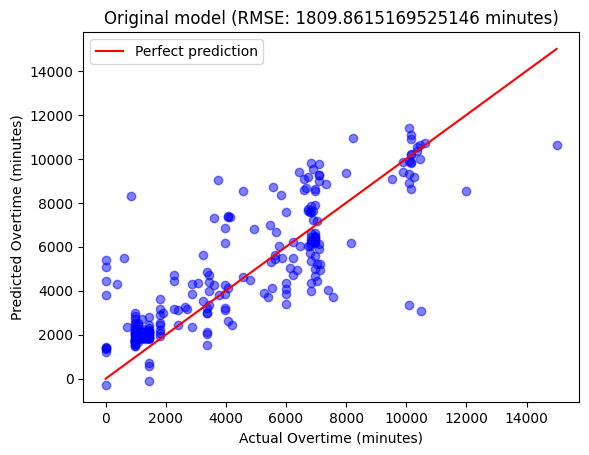

In [40]:
plt.scatter(y_test_denormalized, test_scores_denormalized, alpha=0.5, color='blue')
plt.plot([min(y_test_denormalized), max(y_test_denormalized)], [min(y_test_denormalized), max(y_test_denormalized)], color='red', label='Perfect prediction')
plt.xlabel('Actual Overtime (minutes)')
plt.ylabel('Predicted Overtime (minutes)')
plt.title(f'Original model (RMSE: {rmse_denormalized[0,0]} minutes)') # used the index so it wouldn't be inside square brackets
plt.legend()
plt.show()

**Improving the model**

Despite the hyperparameter tuning we did, the model's predictions are still off by around 1600-2000 minutes on average. This is pretty tragic because the mean of the over_time column is around 4567 minutes, meaning **the predictions are wrong by between a third and half the typical overtime value!** The following section will used to test several theories as to why this is the case and how we might be able to improve the model.

**IMPROVEMENT 1 : Binning & Stratification** 

*Theory: Perhaps my train, test, and validation splits are not representing the overall dataset well enough.*

For categorical targets, we usually stratify when splitting the dataset to ensure the proportions of the classes are similar across the different sets. In this case, it is a little tougher because we are dealing with continuous values, but we can get around that by binning *over_time* so that they become categorical. 

There are two types of binning: equal-width (better when the target instances are evenly distributed) and equal-frequency (better when the target instances are skewed). Thus, before we bin, we must first measure the skewness of *over_time*.

In [41]:
over_time_skewness = skew(df_nn['over_time'])
print(over_time_skewness)

0.6724432830186077


With a skewness of around 0.672, *over_time* is moderately positively skewed, meaning that more data is concentrated around the lower end. As such, we will choose equal-frequency binning. We make a temporary column containing only 5 bins, as any higher leads to a very unequal number of instances per bin.

In [42]:
df_nn['over_time_bins'] = pd.qcut(df_nn['over_time'], q=5, labels=False)
print(df_nn['over_time_bins'].value_counts())

over_time_bins
0    249
2    240
4    239
3    239
1    230
Name: count, dtype: int64


Now that we have done the binning, we can add the column to X amd perform the train_test split again, stratifying by *over_time_bins*.

In [43]:
print(f'Shape before adding over_time_bins: {X.shape}')
X['over_time_bins'] = df_nn['over_time_bins']
print(f'Shape after adding over_time_bins: {X.shape}')

Shape before adding over_time_bins: (1197, 24)
Shape after adding over_time_bins: (1197, 25)


In [44]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=0, stratify=X['over_time_bins'])
X_train, X_val, y_train, y_val = train_test_split (X_train, y_train, test_size=0.2, random_state=0, stratify=X_train['over_time_bins'])

In [45]:
#debugging
print("Train bins distribution:", np.unique(X_train['over_time_bins'], return_counts=True))
print("Val bins distribution:", np.unique(X_val['over_time_bins'], return_counts=True))
print("Test bins distribution:", np.unique(X_test['over_time_bins'], return_counts=True))

Train bins distribution: (array([0, 1, 2, 3, 4]), array([159, 147, 153, 153, 153]))
Val bins distribution: (array([0, 1, 2, 3, 4]), array([40, 37, 39, 38, 38]))
Test bins distribution: (array([0, 1, 2, 3, 4]), array([50, 46, 48, 48, 48]))


We must not forget to drop *over_time_bins* from our sets after splitting as it isn't a feature for our neural network, it's just a temporary column we used to stratify.

In [46]:
X_train = X_train.drop(columns=['over_time_bins'])
X_val = X_val.drop(columns=['over_time_bins'])
X_test = X_test.drop(columns=['over_time_bins'])

In [47]:
#debugging
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(765, 24)
(192, 24)
(240, 24)


We proceed as usual with our process for preparing and training the model.

In [48]:
# convert to tensors
X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32)
X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float32)
X_val = torch.tensor(X_val.to_numpy(), dtype=torch.float32)
y_val = torch.tensor(y_val.to_numpy(), dtype=torch.float32)

# use dataloader for the train set
train_dataloader = DataLoader(X_train, y_train, 16)

In [ ]:
# hyperparameter tuning
best_adam_learning_rate, best_network_structure = hyperparam_tuning()

Learning rate: 0.1 & Network structure: [8]
Validation Loss: 0.015680698677897453
Learning rate: 0.1 & Network structure: [16]
Validation Loss: 0.00841432809829712
Learning rate: 0.1 & Network structure: [32]
Validation Loss: 0.007247149478644133
Learning rate: 0.1 & Network structure: [16, 8]
Validation Loss: 0.010873298160731792
Learning rate: 0.1 & Network structure: [32, 16]
Validation Loss: 0.015218265354633331
Learning rate: 0.1 & Network structure: [32, 16, 8]
Training stopped early due to convergence (Epoch: 232).
Loss difference vs previous epoch: 0.0000012434
Validation Loss: 0.015272378921508789
Learning rate: 0.01 & Network structure: [8]
Training stopped early due to convergence (Epoch: 85).
Loss difference vs previous epoch: 0.0000024918
Validation Loss: 0.006215544417500496
Learning rate: 0.01 & Network structure: [16]
Training stopped early due to convergence (Epoch: 73).
Loss difference vs previous epoch: 0.0000003961
Validation Loss: 0.0050545041449368
Learning rate: 

In [ ]:
# training the tuned model
start_time = time.time()

bs_test_loss, bs_test_scores = train_and_validate(train_dataloader, X_test, y_test, best_adam_learning_rate, best_network_structure, test=True, verbose=False)

end_time = time.time()
training_time = end_time - start_time
print(f"Final model training and testing time: {training_time:.2f} seconds")

In [ ]:
#debugging
numberOfRows = 10
print(bs_test_loss)
print(bs_test_scores.shape)
print(bs_test_scores[:numberOfRows])

It appears that our model with binning and stratification is converging much faster than the original, as the training times are lower due to many more of the hyperparameter tuning runs hitting the minimum loss reduction before reaching the final epoch. Let's take a look at how it performed by getting its predictions and error.

In [ ]:
bs_test_scores_denormalized = overtimescaler.inverse_transform(bs_test_scores.reshape(-1, 1))
bs_y_test_denormalized = overtimescaler.inverse_transform(y_test.reshape(-1, 1))

bs_rmse = torch.sqrt(bs_test_loss)
bs_rmse_denormalized = overtimescaler.inverse_transform(bs_rmse.reshape(-1, 1))

In [ ]:
#debugging
numberOfRows = 15
for i in range(numberOfRows):
    print(f"Prediction: {bs_test_scores_denormalized[i]}, True Value: {bs_y_test_denormalized[i]}")

In [ ]:
#debugging
print(f"MSE: {bs_test_loss}")
print(f"RMSE: {bs_rmse}")
print(f"RMSE denormalized (minutes): {bs_rmse_denormalized}")

It looks like this model tends to perform slightly better than the original model! Let's visualize this using a scatterplot.

In [ ]:
plt.scatter(bs_y_test_denormalized, bs_test_scores_denormalized, alpha=0.5, color='blue')
plt.plot([min(bs_y_test_denormalized), max(bs_y_test_denormalized)], [min(bs_y_test_denormalized), max(bs_y_test_denormalized)], color='red', label='Perfect prediction')
plt.xlabel('Actual Overtime (minutes)')
plt.ylabel('Predicted Overtime (minutes)')
plt.title(f'Model w/ B&S (RMSE: {bs_rmse_denormalized[0,0]} minutes)') # used the index so it wouldn't be inside square brackets
plt.legend()
plt.show()

**IMPROVEMENT 2 : K-fold Cross-Validation** 

*Theory: Perhaps the model is not being fed enough training data.*

With how we're currently splitting the data (80/20 train/test, then 80/20 train/validation), we are only being left with 64% of the data for the training set. Given that there are less than 1,200 instances in total, the training set might be too small for the model to effectively learn the general trend. Let's try to get around this by removing the validation set entirely and replacing it with K-fold Cross Validation for our hyperparameter tuning and model training.

We will be doing this on top of binning and stratification, so let's start by revisiting the our train-test-validation split and making it only split the data into train/test and stratifying by *over_time_bins*.

In [ ]:
X['over_time_bins'] = df_nn['over_time_bins']
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=0, stratify=X['over_time_bins'])

In [ ]:
#debugging
print("Train bins distribution:", np.unique(X_train['over_time_bins'], return_counts=True))
print("Test bins distribution:", np.unique(X_test['over_time_bins'], return_counts=True))
print(X_train.shape)
print(X_test.shape)

In [ ]:
X_train = X_train.drop(columns=['over_time_bins'])
X_test = X_test.drop(columns=['over_time_bins'])

In [ ]:
print(X_train.shape)
print(X_test.shape)

Don't forget to convert them into tensors first.

In [ ]:
X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32)
X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float32)

We now have our X_train and X_test. Next, let's modify our *train_and_validate* function to leverage K-fold Cross Validation for the training and validation of the model. We will be setting the number of folds to 5 to ensure enough data is in each training cycle (5 cycles; in each cycle: train on 4 folds, validate on the last fold).

**Note:** This incidentally means that we will be training on 64% of the data again, since training on 4/5 folds of training data that is 80% of the whole dataset is just 80% of 80%, exactly the amount when we had the validation set. The difference here, however, is that we will be training it for 5 cycles with each one being validated on a different fold, meaning that we still maximize the entire training set.

In [ ]:
def kfcv_train_and_validate (X, y, learning_rate, network_structure, k=5, verbose=False):
    max_epochs = 300
    min_change = 0.000003
    kfcv = KFold(n_splits=k, shuffle=True, random_state=0) # the K-fold object
    fold_losses = []

    for fold, (train_idx, val_idx) in enumerate(kfcv.split(X)):
        if verbose:
            print(f"Fold {fold + 1} of {k}:")

        X_trainfold, y_trainfold = X[train_idx], y[train_idx] # assigning the four training folds
        X_valfold, y_valfold = X[val_idx], y[val_idx] # assigning the validation fold
        train_dataloader = DataLoader(X_trainfold, y_trainfold, 16) # makes a new dataloader per fold because the content of train changes each time

        ann = NeuralNetwork(input_size=24, num_classes=1, list_hidden=network_structure) # we will tune the network structure
        ann.create_network() # builds the neural network
        ann.init_weights() # initializes the weights according to He initialization
        
        optimizer = optim.Adam(ann.parameters(), lr=learning_rate) # we will tune the learning rate

        # early stopping is checked and performed per fold
        this_epoch = 0
        is_converged = False
        prev_loss = 0.0
    
        # train the model
        ann.train() # sets the model to train mode
        while this_epoch < max_epochs and is_converged is not True:
            this_loss = 0.0

            for X_batch, y_batch in zip(*train_dataloader.get_batch(mode='train')):
                optimizer.zero_grad() # empties the gradients
                scores = ann.forward(X_batch) # forward propagation
                loss = criterion(scores, y_batch.view(-1, 1)) # get the loss
                loss.backward() # backpropagation
                optimizer.step() # update the weights
                        
                this_loss += loss.item()

            average_loss = this_loss / len(X_batch)

            if abs(prev_loss - average_loss) < min_change: # stop training early if the change in loss is less than a given minimum
                is_converged = True
                if verbose:
                    print(f"Fold {fold+1} stopped early due to convergence (Epoch: {this_epoch + 1}).")
                    print(f"Loss difference vs previous epoch: {abs(prev_loss - average_loss):.10f}")
                break
    
            else:
                prev_loss = average_loss
                this_epoch+=1

            if verbose:
                print(f'Fold {fold+1}/{k} | Epoch {this_epoch}/{max_epochs}, Loss: {average_loss}')


        # evaluate the model on the validation fold
        ann.eval() # sets the model to evaluation mode

        with torch.no_grad(): # PyTorch doesn't need to track gradients since we're just evaluating (no updating weights)
            fold_scores = ann.forward(X_valfold)
            fold_loss = criterion(fold_scores, y_valfold.view(-1, 1))

        print(f"Fold {fold+1} Loss: {fold_loss}")
        fold_losses.append(fold_loss)

    allfolds_average_loss = sum(fold_losses)/k
    print(f"Average loss across {k} folds: {allfolds_average_loss}")

    return allfolds_average_loss

We will also have to slightly update our hyperparameter tuning loop to use *kfcv_train_and_validate*.

In [ ]:
def kfcv_hyperparam_tuning ():
    best_allfolds_average_loss = 100000
    best_network_structure = None
    best_adam_learning_rate = None
    
    start_time = time.time()
    
    for learning_rate in adam_learning_rates:
        for structure in network_structures:
            print(f"Learning rate: {learning_rate} & Network structure: {structure}")
            allfolds_average_loss = kfcv_train_and_validate(X_train, y_train, learning_rate, structure, verbose=False) # getting each configuration's val loss
    
            if allfolds_average_loss < best_allfolds_average_loss:
                best_allfolds_average_loss = allfolds_average_loss
                best_adam_learning_rate = learning_rate
                best_network_structure = structure
                
    end_time = time.time()
    training_time = end_time - start_time
    
    print(f"Best Learning Rate: {best_adam_learning_rate}")
    print(f"Best Hidden Layer Configuration: {best_network_structure}")
    print(f"Best Average Loss: {best_allfolds_average_loss}")
    print(f"Total hyperparameter tuning time: {training_time:.2f} seconds")

    return best_adam_learning_rate, best_network_structure

Now we can perform hyperparameter tuning using K-fold Cross Validation and get the best optimizer learning rate and network structure.

In [ ]:
best_adam_learning_rate, best_network_structure = kfcv_hyperparam_tuning ()

We train the neural network using the selected hyperparameters as usual, but note that we have a lot more test data now since we did not have to use a dedicated validation split for hyperparameter tuning (80% of the dataset is used to train compared to the previous 64%).

In [ ]:
train_dataloader = DataLoader(X_train, y_train, 16)

In [ ]:
# training the tuned model
start_time = time.time()

kfcv_test_loss, kfcv_test_scores = train_and_validate(train_dataloader, X_test, y_test, best_adam_learning_rate, best_network_structure, test=True, verbose=True)

end_time = time.time()
training_time = end_time - start_time
print(f"Final model training and testing time: {training_time:.2f} seconds")

In [ ]:
#debugging
numberOfRows = 10
print(kfcv_test_loss)
print(kfcv_test_scores.shape)
print(kfcv_test_scores[:numberOfRows])

As expected, hyperparameter tuning is taking a significantly longer time to complete when doing K-fold Cross Validation. Since each fold runs up to all 300 epochs (unless it converges early), we can expect our 5-fold tuning to take 5 times as long as the original time taken. True enough, the seconds elapsed went from around 200 to around 1000.

Let's take a look at how our model performed by getting its predictions and error.

In [ ]:
kfcv_test_scores_denormalized = overtimescaler.inverse_transform(kfcv_test_scores.reshape(-1, 1))
kfcv_y_test_denormalized = overtimescaler.inverse_transform(y_test.reshape(-1, 1))

kfcv_rmse = torch.sqrt(kfcv_test_loss)
kfcv_rmse_denormalized = overtimescaler.inverse_transform(kfcv_rmse.reshape(-1, 1))

In [ ]:
#debugging
numberOfRows = 15
for i in range(numberOfRows):
    print(f"Prediction: {kfcv_test_scores_denormalized[i]}, True Value: {kfcv_y_test_denormalized[i]}")

In [ ]:
#debugging
print(f"MSE: {kfcv_test_loss}")
print(f"RMSE: {kfcv_rmse}")
print(f"RMSE denormalized (minutes): {kfcv_rmse_denormalized}")

Again, this improvement has led to the model performing better than the previous one. Let's visualize it on a scatterplot.

In [ ]:
plt.scatter(kfcv_y_test_denormalized, kfcv_test_scores_denormalized, alpha=0.5, color='blue')
plt.plot([min(kfcv_y_test_denormalized), max(kfcv_y_test_denormalized)], [min(kfcv_y_test_denormalized), max(kfcv_y_test_denormalized)], color='red', label='Perfect prediction')
plt.xlabel('Actual Overtime (minutes)')
plt.ylabel('Predicted Overtime (minutes)')
plt.title(f'Model w/ B&S + KFCV (RMSE: {kfcv_rmse_denormalized[0,0]} minutes)') # used the index so it wouldn't be inside square brackets
plt.legend()
plt.show()

**Final visualization of improvements**

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# First plot - original
axs[0].scatter(y_test_denormalized, test_scores_denormalized, alpha=0.5, color='red')
axs[0].plot([min(y_test_denormalized), max(y_test_denormalized)], 
            [min(y_test_denormalized), max(y_test_denormalized)], 
            color='red', label='Perfect prediction')
axs[0].set_xlabel('Actual Overtime (minutes)')
axs[0].set_ylabel('Predicted Overtime (minutes)')
axs[0].set_title(f'Original model (RMSE: {rmse_denormalized[0,0]:.5f} minutes)')
axs[0].legend()

# Second plot - B&S
axs[1].scatter(bs_y_test_denormalized, bs_test_scores_denormalized, alpha=0.5, color='blue')
axs[1].plot([min(bs_y_test_denormalized), max(bs_y_test_denormalized)], 
            [min(bs_y_test_denormalized), max(bs_y_test_denormalized)], 
            color='red', label='Perfect prediction')
axs[1].set_xlabel('Actual Overtime (minutes)')
axs[1].set_ylabel('Predicted Overtime (minutes)')
axs[1].set_title(f'Model w/ B&S (RMSE: {bs_rmse_denormalized[0,0]:.5f} minutes)')
axs[1].legend()

# Third plot - KFCV
axs[2].scatter(kfcv_y_test_denormalized, kfcv_test_scores_denormalized, alpha=0.5, color='green')
axs[2].plot([min(kfcv_y_test_denormalized), max(kfcv_y_test_denormalized)], 
            [min(kfcv_y_test_denormalized), max(kfcv_y_test_denormalized)], 
            color='red', label='Perfect prediction')
axs[2].set_xlabel('Actual Overtime (minutes)')
axs[2].set_ylabel('Predicted Overtime (minutes)')
axs[2].set_title(f'Model w/ B&S + KFCV (RMSE: {kfcv_rmse_denormalized[0,0]:.5f} minutes)')
axs[2].legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

Sir's advice
1. Use all features (features that are not correlated on their own might have some sense when combined with others)
2. Consider not normalizing the target AKA over_time
3. Since loss is so small, let's look at it as percentage decrease per iteration

Possible improvements:

1. Bin and stratify when doing train-test-val split **[DONE]**
2. Change the split ratios or just use train-test with k-fold validation instead of having a validation set **[DONE]**
3. Patience mechanism in the training?